# Plot fig 4.40

This is the difference between RCPs and SSPs for ERF.

In [5]:
import matplotlib.pyplot as pl
import numpy as np
import pandas as pd

In [59]:
pl.rcParams['figure.figsize'] = (18/2.54, 9/2.54)
pl.rcParams['font.size'] = 9
pl.rcParams['font.family'] = 'Arial'
pl.rcParams['ytick.direction'] = 'out'
pl.rcParams['ytick.minor.visible'] = True
pl.rcParams['ytick.major.right'] = True
pl.rcParams['ytick.right'] = True
pl.rcParams['xtick.major.bottom'] = False
pl.rcParams['axes.spines.bottom'] = False
pl.rcParams['axes.spines.top'] = False

In [60]:
erf = {}
scenarios = ['ssp126', 'ssp245', 'ssp585', 'rcp26', 'rcp45', 'rcp85']

for scenario in scenarios:
    path = '../data_output/' + scenario[:3].upper() + 's/'
    erf[scenario] = pd.read_csv(path + 'ERF_%s_1750-2500.csv' % scenario, index_col=0)
    erf[scenario]['wmghg'] = erf[scenario]['co2'] + erf[scenario]['ch4'] + erf[scenario]['n2o'] + erf[scenario]['other_wmghg']
    erf[scenario]['aerosol'] = erf[scenario]['aerosol-radiation_interactions'] + erf[scenario]['aerosol-cloud_interactions']

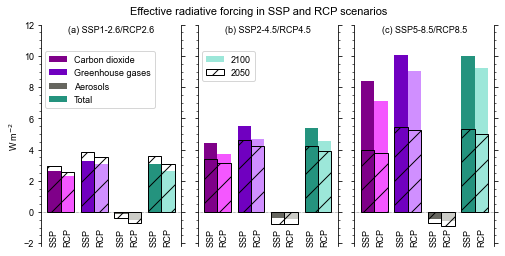

In [105]:
colors_ssp = {
    'co2' : '#7f0089',
    'wmghg' : '#7000c0',
    'aerosol': '#66665f',
    'total_anthropogenic': '#24937e'
}

colors_rcp = {
    'co2' : '#f457ff',
    'wmghg' : '#d08fff',
    'aerosol': '#ccccc7',
    'total_anthropogenic': '#9ce7d9'
}

labels = {
    'co2': 'Carbon dioxide',
    'wmghg': 'Greenhouse gases',
    'aerosol': 'Aerosols',
    'total_anthropogenic': 'Total'
}

sspid = {
    '26' : '1',
    '45' : '2',
    '85' : '5'
}

fig, ax = pl.subplots(1, 3)
for iforc, forc in enumerate(['26', '45', '85']):
    real_name = forc[0] + '.' + forc[1]
    for ispec, specie in enumerate(['co2', 'wmghg', 'aerosol', 'total_anthropogenic']):
        ax[iforc].bar(
            ispec+0.3, erf['ssp'+sspid[forc]+forc].loc[2100,specie], width=0.4, color=colors_ssp[specie],
            label=(labels[specie] if iforc==0 else '')
        )
        ax[iforc].bar(
            ispec+0.7, erf['rcp'+forc].loc[2100,specie], width=0.4, color=colors_rcp[specie],
            label=('2100' if (iforc==1 and ispec==3) else '')
        )
        ax[iforc].bar(ispec+0.3, erf['ssp'+sspid[forc]+forc].loc[2050,specie], width=0.4, color='None', hatch='/', lw=1, edgecolor='k')
        ax[iforc].bar(
            ispec+0.7, erf['rcp'+forc].loc[2050,specie], width=0.4, color='None', hatch='/', lw=1, edgecolor='k',
            label=('2050' if (iforc==1 and ispec==3) else '')
        )
        ax[iforc].text(ispec+0.3, -2.2, 'SSP', ha='center', va='bottom', rotation=90)
        ax[iforc].text(ispec+0.7, -2.2, 'RCP', ha='center', va='bottom', rotation=90)
    ax[iforc].axhline(0, ls=':', color='k', lw=0.5)
    ax[iforc].set_ylim(-2.2, 12)
    ax[iforc].text(2, 11.4, '('+chr(iforc+97)+') SSP'+sspid[forc]+'-'+real_name+'/RCP'+real_name, ha='center', va='bottom')
    
ax[0].set_ylabel('W m$^{-2}$')
ax[1].set_yticklabels([])
ax[2].set_yticklabels([])

ax[0].legend(loc='upper left', bbox_to_anchor=[0,0.9])
ax[1].legend(loc='upper left', bbox_to_anchor=[0,0.9])
subplots_center = 0.5 * (ax[1].get_position().x0 + ax[1].get_position().x1)
pl.figtext(subplots_center, 0.95, 'Effective radiative forcing in SSP and RCP scenarios', ha='center', va='bottom', fontsize=11)
fig.tight_layout(rect=[0,0,1,0.97])
pl.savefig('../figures/fig4.40.png', dpi=300)
pl.savefig('../figures/fig4.40.pdf')